In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
from numpy import dot
from numpy.linalg import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

mean = (0.5592392, 0.5234271, 0.50873935)
std = (0.21591803, 0.21961282, 0.22185005)

testTransform = transforms.Compose([
    transforms.Resize((224, 224)),          # 사진 파일의 크기가 다르므로, Resize로 맞춰줍니다.
    transforms.ToTensor(), 
    transforms.Normalize(mean,std) # 이미지 정규화
])

In [3]:
def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

In [4]:
# model 불러오기
model = torch.load("MobileNetV2.pt", map_location=device)
model.to(device)
model.eval()

# 특징 벡터만 필요하기 때문에 classifier는 제거
model.classifier = nn.Sequential()

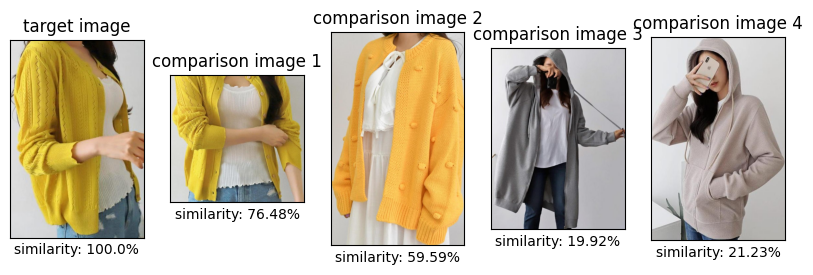

In [5]:
fig = plt.figure(figsize=(10, 15))
rows = 1
cols = 5

target = np.empty(1280)

for i in range(0, cols):
    imgPath = f"testImg/img-{i}.jpg"
    img = Image.open(imgPath)
    inputImg = testTransform(img).to(device)
    inputImg = inputImg.unsqueeze(0)
    out = model(inputImg)
    
    title = f"comparison image {i}"
    out_np = out.detach().cpu().numpy()
    if i == 0:
        target = out_np
        title = "target image"
    
    result = cos_sim(target[0], out_np[0])
    result = max(round(result * 100, 2), 0)
    
    # Visualization
    ax2 = fig.add_subplot(rows, cols, i+1)
    ax2.imshow(img)
    ax2.set_title(title)
    ax2.set_xlabel("similarity: " + str(result) + "%")
    ax2.set_xticks([]), ax2.set_yticks([])
    
plt.show()
    
